# Conway's Game of Life [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maxencefaldor/cax/blob/main/examples/11_life.ipynb)

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda12]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "cax[examples]"

## Import

In [1]:
import jax
import jax.numpy as jnp
import mediapy
from flax import nnx

from cax.systems.life import Life

## Configuration

In [2]:
seed = 0

spatial_dims = (32, 32)

num_steps = 128

key = jax.random.key(seed)
rngs = nnx.Rngs(seed)

## Instantiate system

In [3]:
ca = Life(rngs=rngs)

In [4]:
ca.update.update_birth_survival_from_string("B3/S23")

## Sample initial state

In [5]:
def sample_state():
	"""Sample a state with a glider for the Game of Life."""
	state = jnp.zeros((*spatial_dims, 1))

	mid_x, mid_y = spatial_dims[0] // 2, spatial_dims[1] // 2
	glider = jnp.array(
		[
			[0.0, 1.0, 0.0],
			[0.0, 0.0, 1.0],
			[1.0, 1.0, 1.0],
		]
	)
	return state.at[mid_x : mid_x + 3, mid_y : mid_y + 3, 0].set(glider)

## Run

In [6]:
state_init = sample_state()
state_final, states = ca(state_init, num_steps=num_steps)

## Visualize

""

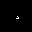

In [7]:
states = jnp.concatenate([state_init[None], states])
frames = nnx.vmap(
	lambda ca, state: ca.render(state),
	in_axes=(None, 0),
)(ca, states)

mediapy.show_video(frames, width=256, height=256, codec="gif")

## Life Family

You can experiment with other [Life-like Cellular Automata](https://en.wikipedia.org/wiki/Life-like_cellular_automaton) by changing the rule.

### [HighLife](https://en.wikipedia.org/wiki/Highlife_(cellular_automaton))

In [8]:
ca.update.update_birth_survival_from_string("B36/S23")

### [Life without Death](https://en.wikipedia.org/wiki/Life_without_Death)

In [9]:
ca.update.update_birth_survival_from_string("B3/S012345678")

### Run

In [10]:
state_init = sample_state()
state_final, states = ca(state_init, num_steps=num_steps)

### Visualize

""

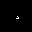

In [11]:
states = jnp.concatenate([state_init[None], states])
frames = nnx.vmap(
	lambda ca, state: ca.render(state),
	in_axes=(None, 0),
)(ca, states)

mediapy.show_video(frames, width=256, height=256, codec="gif")